# EDA on the Titles

In [ ]:
import pandas as pd
import pickle
import numpy as np
from utils import *
from challenge.dataset.utils import typical_string_processing

X_dataframe = pd.read_csv("../data/X_dataframe.csv")

In [3]:
X_dataframe["title"].describe()

count                                             90000
unique                                            89008
top       50 Suspensores Para Short De Baño Tela Calada
freq                                                 66
Name: title, dtype: object

In [3]:
X_dataframe["title"].value_counts()

title
50 Suspensores Para Short De Baño Tela Calada                66
50 Suspensores Para Short De Baño Nido De Abeja              45
Confeccion Short De Baño Bermudas Hombre Y Niño              32
50 Suspensores Para Short De Baño Tela Nido De Abeja         30
Camisas Corte Y Confeccion Producto Terminado                30
                                                             ..
Juana De Arco En La Hoguera. Paul Claudel.1948                1
La Prueba   Peter Veres                                       1
Cuchillo Puma Outdoor 6378                                    1
Globo Peppa Pig X 10 Metalizado Mas Varillas Y Canastillo     1
Campera De Mujer Tucci Reversible                             1
Name: count, Length: 89008, dtype: int64

In [12]:
X_dataframe["title"].apply(typical_string_processing).value_counts()[30:]

title
velador antiguo                                               4
antigüa postal de italia                                      4
vestido de novia                                              4
pulsera                                                       4
cuadro                                                        4
                                                             ..
soga p/ saltar entrenamiento crossfit aerobic alta calidad    1
recuerdo - castillo a -nuevo cd #db3                          1
interface de comando al volante vw bora                       1
florero de ceramica - hermoso !!!                             1
campera de mujer tucci reversible                             1
Name: count, Length: 88959, dtype: int64

## Try to group the titles manually

For the `title` feature, we will attempt to **group titles manually** into broader categories.  
The goal is to capture common patterns (e.g., presence of keywords like *nuevo*, *usado*, *garantía*, *original*) that may correlate with item condition.  

This manual grouping will serve as a first step before applying more advanced text-processing techniques.

In [13]:
car_brands = [
    "chevrolet",
    "ford",
    "peugeot",
    "renault",
    "fiat",
    "toyota",
    "volkswagen",
    "honda",
    "hyundai",
    "nissan",
    "citroen",
    "citroën",
    "jeep",
    "auto",
    "camioneta",
    "subaru",
    "rover",
]

motorcycle_brands = [
    "honda",
    "yamaha",
    "suzuki",
    "harley-davidson",
    "kawasaki",
    "triumph",
    "bmw",
    "ducati",
    "motocicleta",
]


def string_and_car(x: str) -> bool:
    is_car = False
    x = typical_string_processing(x)
    for word in car_brands:
        if word in x:
            is_car = True
            break
    for word in motorcycle_brands:
        if word in x:
            is_car = True
            break
    return is_car

In [ ]:
X_dataframe["is_car"] = X_dataframe["title"].apply(string_and_car)
X_dataframe.groupby("is_car")["used"].value_counts()

is_car  used 
False   False    42990
        True     40016
True    False     5362
        True      1632
Name: count, dtype: int64

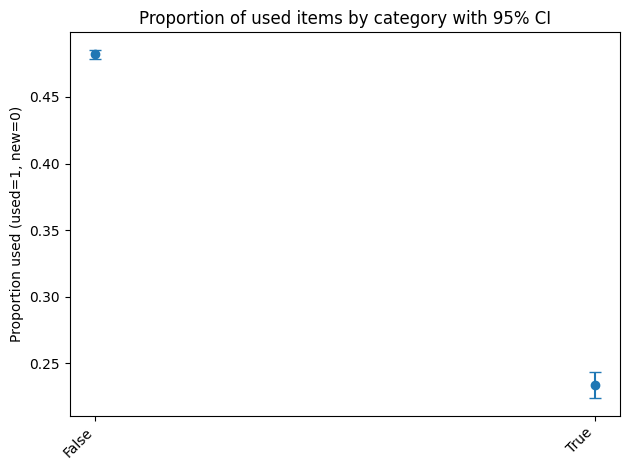

In [27]:
res = column_analysis("is_car", X_dataframe)
plot_column_analysis(res)

The `is_car` shows a different distribution for used and new

In [18]:
home_words = [
    "mesa",
    "silla",
    "tv",
    "parrilla",
    "velador",
    "cama",
    "sofa",
    "sillon",
    "escritorio",
    "cuadro",
    "almohadon",
    "almohada",
    "alfombra",
    "florero",
    "perchero",
    "comoda",
    "cortina",
    "espejo",
    "tazas",
    "platos",
    "vajilla",
    "cuchara",
    "cuchillo",
    "tenedor",
    "cazuela",
    "olla",
    "sarten",
    "tostadora",
    "exprimidor",
    "heladera",
    "microondas",
    "televisor",
    "lampara",
]
def string_and_home(x: str) -> bool:
    is_home = False
    x = typical_string_processing(x)
    for word in home_words:
        if word in x:
            is_home = True
            break
    return is_home


X_dataframe["is_home"] = X_dataframe["title"].apply(string_and_home)
X_dataframe.groupby("is_home")["used"].value_counts()

is_home  used 
False    False    45173
         True     39282
True     False     3179
         True      2366
Name: count, dtype: int64

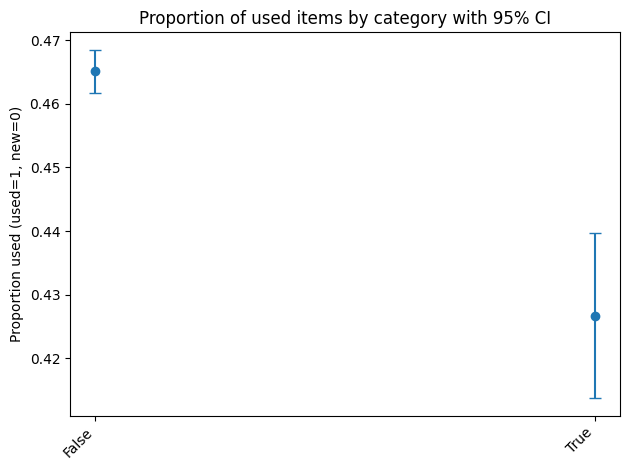

In [26]:
res = column_analysis("is_home", X_dataframe)
plot_column_analysis(res)

Although it captures well if it's a home item, the distribution and the p value is not good for further predictions

In [20]:
electronics_words = [
    "laptop",
    "notebook",
    "televisor",
    "celular",
    "tablet",
    "teclado",
    "smartphone",
    "smartwatch",
    "iphone",
    "ipad",
    "samsung",
    "motorola",
    # "lg",
    "sony",
    "panasonic",
    "philips",
    # "jbl",
    "bose",
    "beats",
    "apple",
]
def string_and_electronics(x: str) -> bool:
    is_electronics = False
    x = typical_string_processing(x)
    for word in electronics_words:
        if word in x:
            is_electronics = True
            break
    return is_electronics

X_dataframe["is_electronics"] = X_dataframe["title"].apply(
    string_and_electronics
)
X_dataframe.loc[
    ~X_dataframe["is_car"] & ~X_dataframe["is_home"]
].groupby("is_electronics")["used"].value_counts()

is_electronics  used 
False           False    38094
                True     36605
True            False     1961
                True      1091
Name: count, dtype: int64

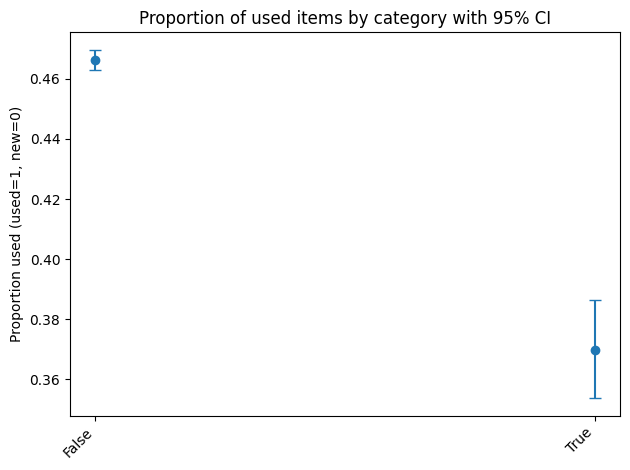

In [28]:
res = column_analysis("is_electronics", X_dataframe)
plot_column_analysis(res)


Different distribution but not strong p

In [22]:
X_dataframe.loc[
    ~X_dataframe["is_electronics"] & ~X_dataframe["is_car"] & ~X_dataframe["is_home"]
]["title"].value_counts()[:25]

title
50 Suspensores Para Short De Baño Tela Calada                   66
50 Suspensores Para Short De Baño Nido De Abeja                 45
Confeccion Short De Baño Bermudas Hombre Y Niño                 32
Camisas Corte Y Confeccion Producto Terminado                   30
50 Suspensores Para Short De Baño Tela Nido De Abeja            30
12 Suspensores Para Short De Baño Nido De Abeja                 26
12 Suspensores Para Short De Baño Tela Calada                   24
50 Suspensores Para Short De Baño Tela Red                      22
Item De Testeo, Por Favor No Ofertar                            17
12 Suspensores Para Short De Baño Tela Nido De Abeja            14
Consolador Anal Mini Pene 11 X 2 Cm                              8
Camisas Producto Terminado Corte Y Confeccion                    8
Consolador Macizo. Sex Shop                                      8
Confeccion Short De Baño Bermudas Hombre Y Niños                 8
Triple Estimulador Anal Vaginal Anillo Con Vibrador 16 X

In [23]:
clothes_words = [
    "campera",
    "camisa",
    "zapato",
    "vestido",
    "pantalon",
    "remera",
    "camiseta",
    "chaqueta",
    "bikini",
    "short",
    "zapatilla",
    "falda",
    "pollera",
    "zoquete",
    "soquete",
    "cartera",
    "caterita",
    "bolso",
    "mochila",
    "collar",
    "caravana",
    "pulsera",
    "chaleco",
    "traje",
    "corbata",
    "gorra",
    "gorro",
    "gafas",
    "botas",
    "tacones",
]


def string_and_clothes(x: str) -> bool:
    is_clothes = False
    x = typical_string_processing(x)
    for word in clothes_words:
        if word in x:
            is_clothes = True
            break
    return is_clothes


X_dataframe["is_clothes"] = X_dataframe["title"].apply(string_and_clothes)
X_dataframe.groupby("is_clothes")["used"].value_counts()

is_clothes  used 
False       False    44657
            True     39216
True        False     3695
            True      2432
Name: count, dtype: int64

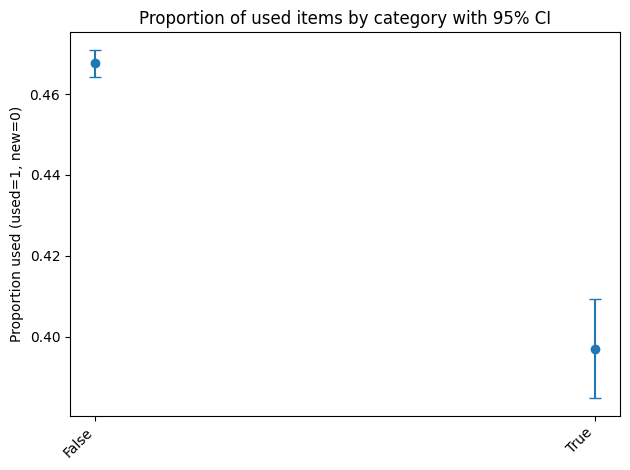

In [ ]:
res = column_analysis("is_clothes", X_dataframe)
plot_column_analysis(res)

Different distribution but not strong p

In [34]:
sex_shop_one_word_words = [
    "consolador",
    "vibrador",
    "anal",
    "pene",
    "peneano",
    "masajes",
]
sex_shop_two_word_words = [
    "vibrador anal",
    "consolador anal",
    "lubricante para",
    "gel lubricante",
]


def string_and_sex_shop(x: str) -> bool:
    is_sex_shop = False
    x = typical_string_processing(x)
    one_word_x = x.split(" ")
    for word in one_word_x:
        if word in sex_shop_one_word_words:
            is_sex_shop = True
            break
    two_word_x = x.split(" ")
    # Get the combination of the two words
    for i in range(len(two_word_x)):
        for j in range(i + 1, len(two_word_x)):
            if two_word_x[i] + " " + two_word_x[j] in sex_shop_two_word_words:
                is_sex_shop = True
                break
    return is_sex_shop


X_dataframe["is_sex_shop"] = X_dataframe["title"].apply(string_and_sex_shop)
X_dataframe.groupby("is_sex_shop")["used"].value_counts()

is_sex_shop  used 
False        False    48109
             True     41644
True         False      243
             True         4
Name: count, dtype: int64

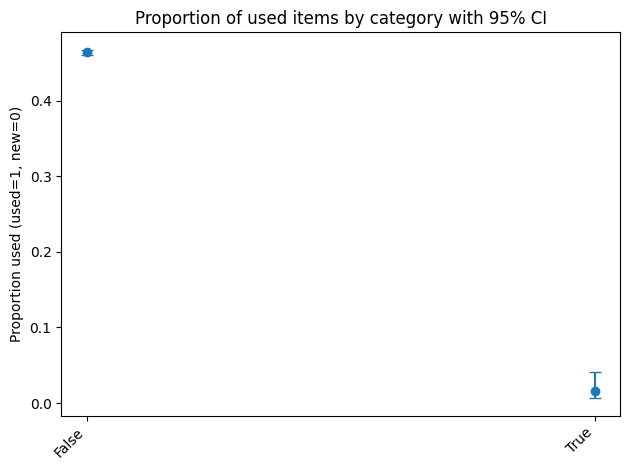

In [36]:
res = column_analysis("is_sex_shop", X_dataframe)
plot_column_analysis(res)


Makes sense that whatever a sex shop sells, it is not in used condition. 

In [37]:
def is_nuevo_or_usado(x: str):
    x = typical_string_processing(x)
    if "nuevo" in x or "de fabrica" in x:
        if "casi nuevo" in x or "como nuevo" in x:
            return "usado"
        else:
            return "nuevo"
    elif "usado" in x or "segunda mano" in x:
        return "usado"
    else:
        return "unknown"


X_dataframe["nuevo_or_usado"] = X_dataframe["title"].apply(
    is_nuevo_or_usado
)
X_dataframe.groupby("nuevo_or_usado")["used"].value_counts()

nuevo_or_usado  used 
nuevo           False     2810
                True       313
unknown         False    45527
                True     40641
usado           True       694
                False       15
Name: count, dtype: int64

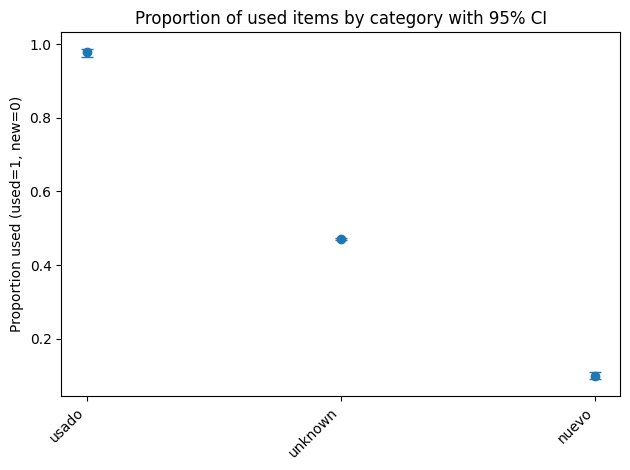

In [38]:
res = column_analysis("nuevo_or_usado", X_dataframe)
plot_column_analysis(res)


#### 💡 Insights  
The manual categorization of titles resulted in very sparse groups:  
no single category occurs more than ~6k times, which limits its usefulness as a feature.  

Next, we will explore **text encoders** to check whether the titles naturally cluster and provide stronger signal for predicting item condition.

# RoBERTa Encoder

In [41]:
from transformers import AutoModel, AutoTokenizer
import torch
import tqdm


# encoder that's trained in spanish
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")
model = AutoModel.from_pretrained("FacebookAI/xlm-roberta-base", dtype=torch.float16)

train_titles = X_dataframe["title"].to_list()

batch_size = 32
num_batches = len(train_titles) // batch_size + 1
embeddings_list = []
train_titles_list = train_titles
for i in tqdm.tqdm(range(num_batches)):
    batch = train_titles_list[i * batch_size : (i + 1) * batch_size]
    inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True).to(
        model.device
    )
    with torch.no_grad():
        outputs = model(**inputs)
    attention_mask = inputs["attention_mask"]
    embeddings = outputs.last_hidden_state
    mask_expanded = attention_mask.unsqueeze(-1).expand(embeddings.size())
    sentence_embeddings = torch.sum(embeddings * mask_expanded, 1) / mask_expanded.sum(
        1
    )
    embeddings_list.append(sentence_embeddings)

embeddings_tensor = torch.cat(embeddings_list)

100%|██████████| 2813/2813 [1:04:35<00:00,  1.38s/it]  


In [54]:
embeddings_tensor = torch.cat(embeddings_list, dim=0)
embeddings_tensor.shape

torch.Size([90000, 768])

In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime
from tqdm import tqdm

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_dir = f"tensorboard_logs/embeddings_beto_encoder_{timestamp}"
os.makedirs(log_dir, exist_ok=True)

writer = SummaryWriter(log_dir)


embeddings_array = np.stack(embeddings_tensor.cpu().numpy())  # Shape: (num_embeddings, embedding_dim)
print(f"Stacked embeddings shape: {embeddings_tensor.shape}")

labels = X_dataframe["used"]

metadata = []
for label in labels:
    metadata.append(label)


writer.add_embedding(
    embeddings_tensor,
    metadata=metadata,
    global_step=0,
    tag="title_embeddings",
)


writer.close()

print(f"Embeddings logged to TensorBoard in directory: {log_dir}")
print("To view the embeddings, run:")
print(f"tensorboard --logdir={log_dir}")
print("Then open http://localhost:6006 in your browser")

Stacked embeddings shape: torch.Size([90000, 768])


100%|██████████| 90000/90000 [00:00<00:00, 5713186.32it/s]


Embeddings logged to TensorBoard in directory: tensorboard_logs/embeddings_beto_encoder_20250903_224814
To view the embeddings, run:
tensorboard --logdir=tensorboard_logs/embeddings_beto_encoder_20250903_224814
Then open http://localhost:6006 in your browser


#### 💡 Insights  
The embeddings projected with PCA to 3 dimensions do not appear to be linearly separable between new and used items — the points are highly mixed.  

This outcome makes sense: the information in the `title` is more related to the **product category** than directly to the item’s condition.  

![RoBERTa encoder](./Roberta_1_0_labels.png) To better leverage the information from `title`, we will group embeddings into **clusters** and check whether certain clusters are more associated with new or used items.  

The approach will be:  
1. **Dimensionality reduction** → Apply PCA to the training embeddings, retaining enough components to explain 80% of the variance (to keep clustering efficient).  
2. **Clustering** → Apply KMeans and determine the optimal number of clusters using both inertia and silhouette scores.  
3. **Cluster analysis** → Evaluate the proportion of new vs. used items within each cluster to identify potential predictive patterns.  

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

embeddings_array = embeddings_tensor.cpu().numpy()
pca = PCA(n_components=0.8)
pca.fit(embeddings_array)

,n_components,0.8
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [59]:
print(f"Number of components: {pca.n_components_}")
embeddings_array_pca = pca.transform(embeddings_tensor)

Number of components: 90


In [60]:
embeddings_array_pca = pca.transform(embeddings_array)
Xn = normalize(embeddings_array_pca)

In [ ]:
def pick_best_k(
    X,
    k_values=range(5, 21),
    n_init=20,
    max_iter=300,
    random_state=42,
):
    results = []

    X_sil = X

    best_k = None
    best_sil = -1.0
    best_model = None

    for k in k_values:
        km = KMeans(
            n_clusters=k,
            n_init=n_init,
            max_iter=max_iter,
            random_state=random_state,
            verbose=0,
        ).fit(X)

        inertia = km.inertia_

        # Metrics
        # (Silhouette uses sample for speed if large; others on full set)
        sil = silhouette_score(X_sil, km.predict(X_sil))

        results.append(
            {
                "k": k,
                "inertia": inertia,
                "silhouette": sil,
            }
        )

        if sil > best_sil:
            best_sil = sil
            best_k = k
            best_model = km

    return best_k, best_model, results
k_range = range(5, 21)
best_k, best_kmeans, metrics_table = pick_best_k(Xn, k_values=k_range)

In [64]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_dir = f"tensorboard_logs/embeddings_roberta_{timestamp}"
os.makedirs(log_dir, exist_ok=True)

writer = SummaryWriter(log_dir)


metadata = [
    [str(labels[i]), str(best_kmeans.labels_[i])] for i in range(len(embeddings_tensor))
]


writer.add_embedding(
    embeddings_tensor,  # shape [N, D], CPU tensor
    metadata=metadata,  # list of [label, cluster]
    metadata_header=["label", "cluster"],
    global_step=0,
    tag="title_embeddings",
)

writer.close()

print(f"Embeddings logged to TensorBoard in directory: {log_dir}")
print("To view the embeddings, run:")
print(f"tensorboard --logdir={log_dir}")
print("Then open http://localhost:6006 in your browser")

Stacked embeddings shape: torch.Size([90000, 768])
Embeddings logged to TensorBoard in directory: tensorboard_logs/embeddings_roberta_20250903_230521
To view the embeddings, run:
tensorboard --logdir=tensorboard_logs/embeddings_roberta_20250903_230521
Then open http://localhost:6006 in your browser


<img src="Roberta_10_kmeans.png" alt="RoBERTa encoder" width="600">
#### 💡 Insights  
Although the visualization shows clusters that appear very close together, this is likely an effect of reducing the embeddings to **3 dimensions**.  
In higher-dimensional space, the separation between clusters may be more meaningful, even if it is not clearly visible here.

In [ ]:
with open("embeddings_roberta.pkl", "wb") as f:
    pickle.dump(embeddings_array, f)

with open("PCA_roberta.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("best_kmeans_roberta.pkl", "wb") as f:
    pickle.dump(best_kmeans, f)

In [4]:
a = pickle.load(open("PCA_roberta.pkl", "rb"))
b = pickle.load(open("best_kmeans_roberta.pkl", "rb"))
c = pickle.load(open("embeddings_roberta.pkl", "rb"))

In [7]:
X_dataframe["title_cluster"] = best_kmeans.labels_
X_dataframe["title_cluster"].value_counts()


title_cluster
1    21259
2    19378
0    17772
4    16845
3    14746
Name: count, dtype: int64

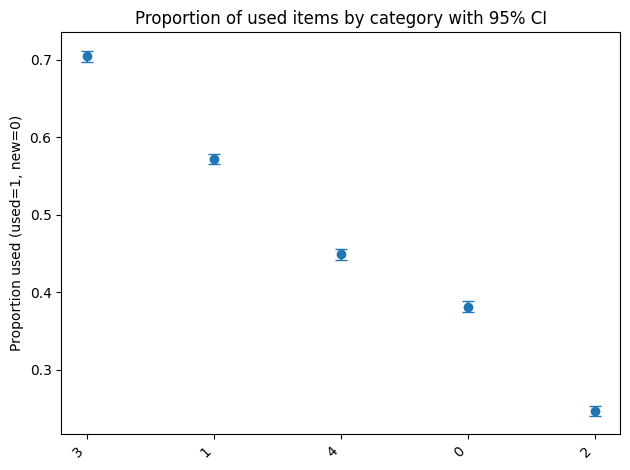

In [ ]:
res = column_analysis("title_cluster", X_dataframe)
plot_column_analysis(res)

#### 💡 Insights  
Each cluster shows a distinct distribution of item condition, which is promising since it suggests clustering captures meaningful patterns.  

- **Cluster 3** has a high proportion of used items.  
- **Cluster 2** has a high proportion of new items.  

This indicates that cluster assignments may provide **valuable predictive information** for the model.